In [1]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from math import sin,cos,pi
import scipy 
from sklearn.metrics import adjusted_rand_score

import seaborn as sns
argk = 5
folder_path = './datas/buque/'
folder_path2 = './datas/buque1/'

# folder_path2 = './datas/ohss/'
subsize = 20
pcanum = 20
tempnum = 1000

In [4]:
# datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
# adata_subset = datas[:tempnum,:]
# datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
# datas = datas[datas.obs[datas.obs['layer_guess_reordered']!='Layer5'].index]
# sc.write('./datas/nature/zise.h5',datas)
datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
indices = np.random.choice(datas.n_obs, size=subsize, replace=False)


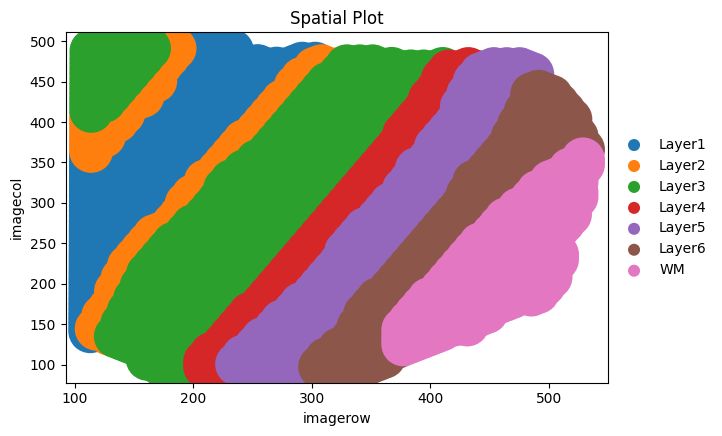

In [5]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

In [13]:
adata1 = pd.read_csv(folder_path + 'pca.csv')
adata1 = adata1.set_index(adata1.columns[0])
adata1 = adata1.T
adata1.index = datas.obs.julei
adata1
# adata1.to_csv(folder_path+'datas.data',header=None);
# adata1.to_csv(folder_path+'datas.csv')

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
julei,,,,,,,,,,,,,,,,,,,,
1,-1.742179,-0.050372,0.172844,2.192438,-0.777553,-4.132174,1.636083,1.739748,0.270036,-2.573790,-0.470066,-0.515245,-0.126150,-0.132189,0.190587,0.518257,1.745402,1.127538,-1.012781,0.484063
3,4.208592,-0.188750,-0.850747,-0.732998,1.336927,1.366941,1.130777,-0.353206,-0.060463,0.475084,0.766953,-0.065829,0.621593,0.378397,-0.311984,0.169382,0.094349,0.323343,0.355282,0.735483
1,-8.122478,8.238340,-2.817448,-3.844993,-1.577289,-0.367433,-0.526728,0.374770,1.681578,1.073618,2.758376,0.380476,0.153697,0.705445,-0.267159,-0.631223,-0.152607,0.123091,-0.202371,0.939734
0,-15.563433,-8.868978,5.220857,-4.435772,2.248321,1.530303,-0.325219,-1.786930,-0.099736,-0.156798,-0.764029,1.235195,0.907501,-0.273418,0.470980,-0.115996,1.055449,-0.224519,2.311397,0.503695
2,2.585480,-1.649134,-0.027134,-0.087575,-3.085096,-1.255844,1.381870,-1.967390,-3.015521,2.926177,0.604160,0.950124,-0.354756,-0.858949,1.690995,-0.863722,-0.497408,0.504896,0.390848,-1.036021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3.602209,2.274316,0.859793,-1.887574,1.028837,0.160600,-0.779891,0.649933,0.058348,-0.661194,-0.129109,-0.218892,-0.683292,0.442794,0.489751,0.162806,0.290944,0.404469,0.804577,-0.261684
2,-0.240509,-3.556936,1.898851,-0.375175,-2.388757,0.033545,-0.173732,1.782998,-1.256519,1.225309,-0.382412,-1.119076,-1.028756,0.334160,0.193641,0.333617,-0.223856,0.283033,0.393235,0.034724
0,-10.261098,-7.747452,1.222923,2.723484,2.947516,-2.285964,-0.099366,1.651121,-2.607931,-0.302745,1.238690,-2.321925,2.557547,2.055927,-2.068037,-1.114067,-1.470836,1.470817,-1.015627,1.710812


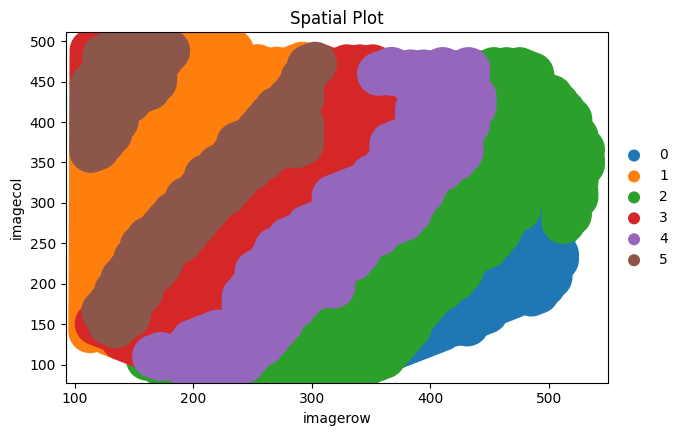

In [14]:
metas = np.load(folder_path+'cluster.npy')
datas.obs['julei']= metas
sc.pl.scatter(datas,'imagerow', 'imagecol', color='julei', title='Spatial Plot',size=4000)

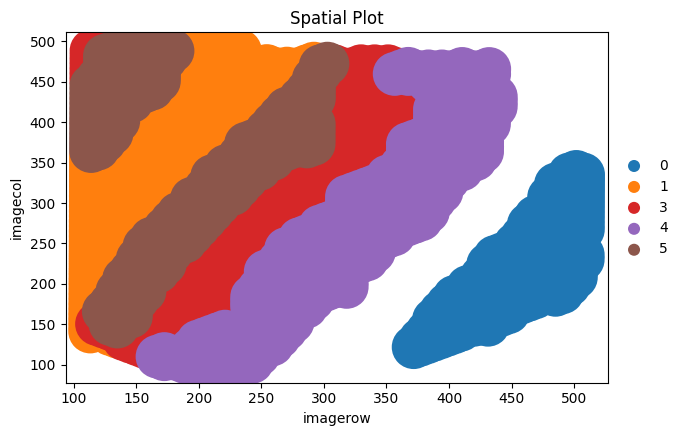

In [15]:
subset = datas[datas.obs[datas.obs['julei']!='2'].index]
subset
sc.pl.scatter(subset,'imagerow', 'imagecol', color='julei', title='Spatial Plot',size=4000)

In [16]:
sub_adata = adata1[adata1.index!='2']
sub_adata.index = subset.obs['julei']
sub_adata.groupby(sub_adata.index).mean()

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
julei,,,,,,,,,,,,,,,,,,,,
0,-10.098190,-6.289515,2.529854,-0.330850,1.470906,-0.180589,-0.119719,-0.035728,-0.458676,0.182845,0.139806,-0.055256,-0.266528,0.406889,-0.366496,-0.009176,0.194416,0.070322,-0.093712,0.060230
1,-5.331067,4.964400,-1.595576,-0.180147,-0.575764,0.247040,0.001630,0.391069,-0.080431,-0.051188,0.105066,0.063914,0.026743,-0.050351,0.134779,-0.080051,0.057466,-0.016045,0.099697,0.086822
3,3.646162,1.552550,0.775758,-0.615766,1.352093,0.159734,0.219616,-0.059942,-0.233323,0.438171,0.084806,0.134013,0.128982,-0.069533,-0.296155,0.191154,0.212204,0.077992,0.233631,-0.119701
4,3.227504,-1.731686,-1.717394,-0.882518,1.516479,0.341473,0.471013,0.140743,0.221228,-0.246959,0.132110,-0.290422,-0.094724,-0.072339,0.550940,-0.272922,-0.191720,0.072931,-0.245605,0.261360
5,3.019866,3.887349,4.002530,0.968069,-0.481340,-0.200851,-0.840788,0.125556,0.032720,-0.537497,-0.025589,0.214252,0.050777,0.201870,0.447738,-0.363209,-0.007617,-0.138039,-0.154846,0.350380


In [17]:
sub_adata.groupby(sub_adata.index).mean().to_csv(folder_path2+"datas.data",header=None);
sub_adata.groupby(sub_adata.index).mean().to_csv(folder_path2+"datas.csv");

./datas/buque1/datas.data length:5
Generating all pairs superset


100%|██████████| 1563/1563 [01:07<00:00, 23.05ex/s, loss=0.731835] 


	 Epoch 0 | average train loss: 0.798153
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.42ex/s, loss=0.759932] 


	 Epoch 1 | average train loss: 0.771229
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.44ex/s, loss=0.618531] 


	 Epoch 2 | average train loss: 0.771584
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.80ex/s, loss=0.828171] 


	 Epoch 3 | average train loss: 0.770948
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.87ex/s, loss=0.852738] 


	 Epoch 4 | average train loss: 0.777410
Optimization finished.


100%|██████████| 1563/1563 [01:10<00:00, 22.14ex/s, loss=0.769080] 


	 Epoch 5 | average train loss: 0.766840
Optimization finished.


100%|██████████| 1563/1563 [01:09<00:00, 22.41ex/s, loss=0.937167]


	 Epoch 6 | average train loss: 0.770137
Optimization finished.


100%|██████████| 1563/1563 [01:09<00:00, 22.50ex/s, loss=0.715995]


	 Epoch 7 | average train loss: 0.766025
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.76ex/s, loss=0.626951] 


	 Epoch 8 | average train loss: 0.768332
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.76ex/s, loss=0.852929] 


	 Epoch 9 | average train loss: 0.769510
Optimization finished.


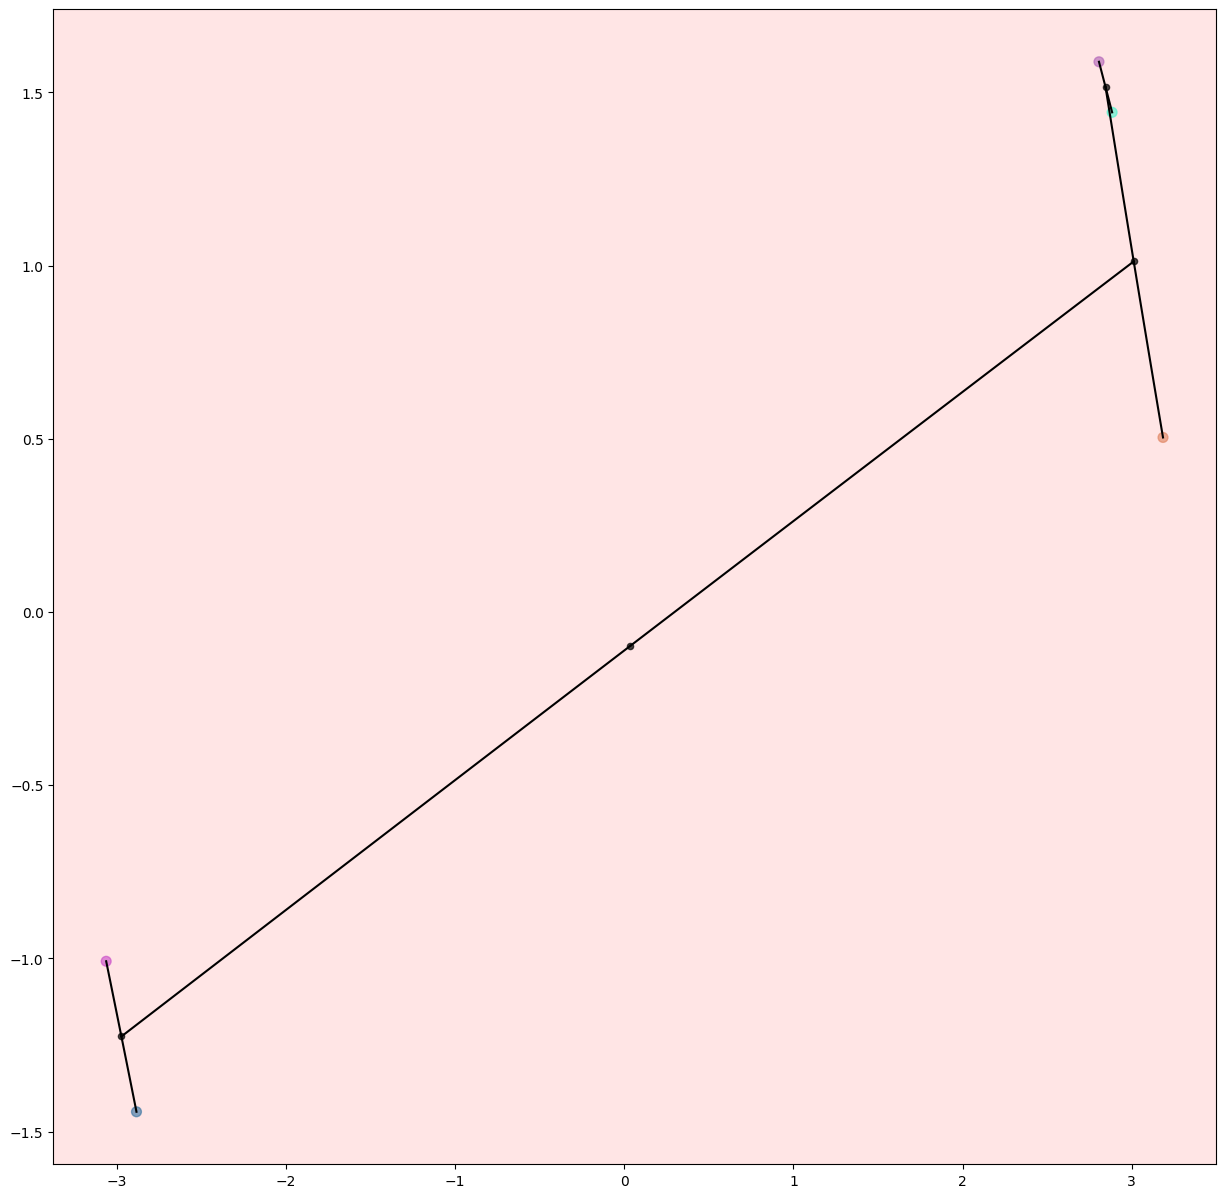

In [18]:
get_Hyper_tree(folder_path2+'datas.data',1,sub_adata.groupby(sub_adata.index).mean().shape[1]+1,0,10,model_path=None,save_path=folder_path2,c=-1)


In [19]:
nodes1,n1 = build_hyper_tree(folder_path)
show_tree(nodes1[0]).show_fig()
nodes2,n2 = build_hyper_tree(folder_path2)
show_tree(nodes2[0]).show_fig()
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
G.show_fig()

The mininum cost for alignment is 2.2796992481203007
The alignment edges list is [('10', '8'), ('9', '6'), ('1', '1'), ('0', '0'), ('8', '7'), ('7', '5'), ('5', '4'), ('3', '2'), ('4', '3')]
